In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Dataset

df= pd.read_csv('world_population.csv')
df.head()


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
df.isnull()


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.columns= df.columns.str.strip()

EDA
Top 10 most populated countries
Growth trends over years
Literacy rate distribution

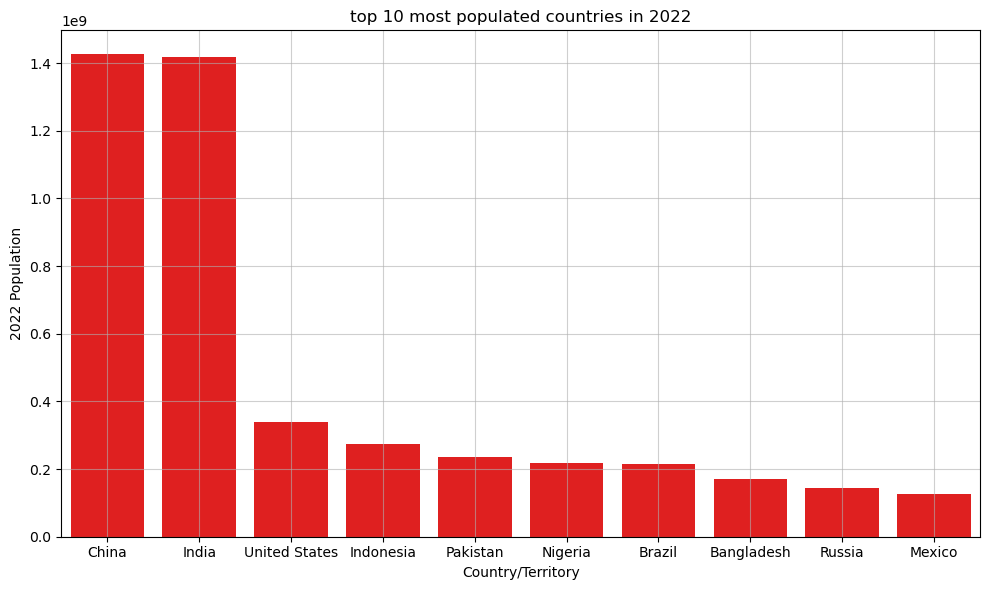

In [7]:
#Top 10 most populated countries
top10_populated= df.sort_values(by= '2022 Population', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Territory', y='2022 Population', data=top10_populated, color='red')
plt.title('top 10 most populated countries in 2022')
plt.tight_layout()
plt.grid(True, alpha=0.6)
plt.show()

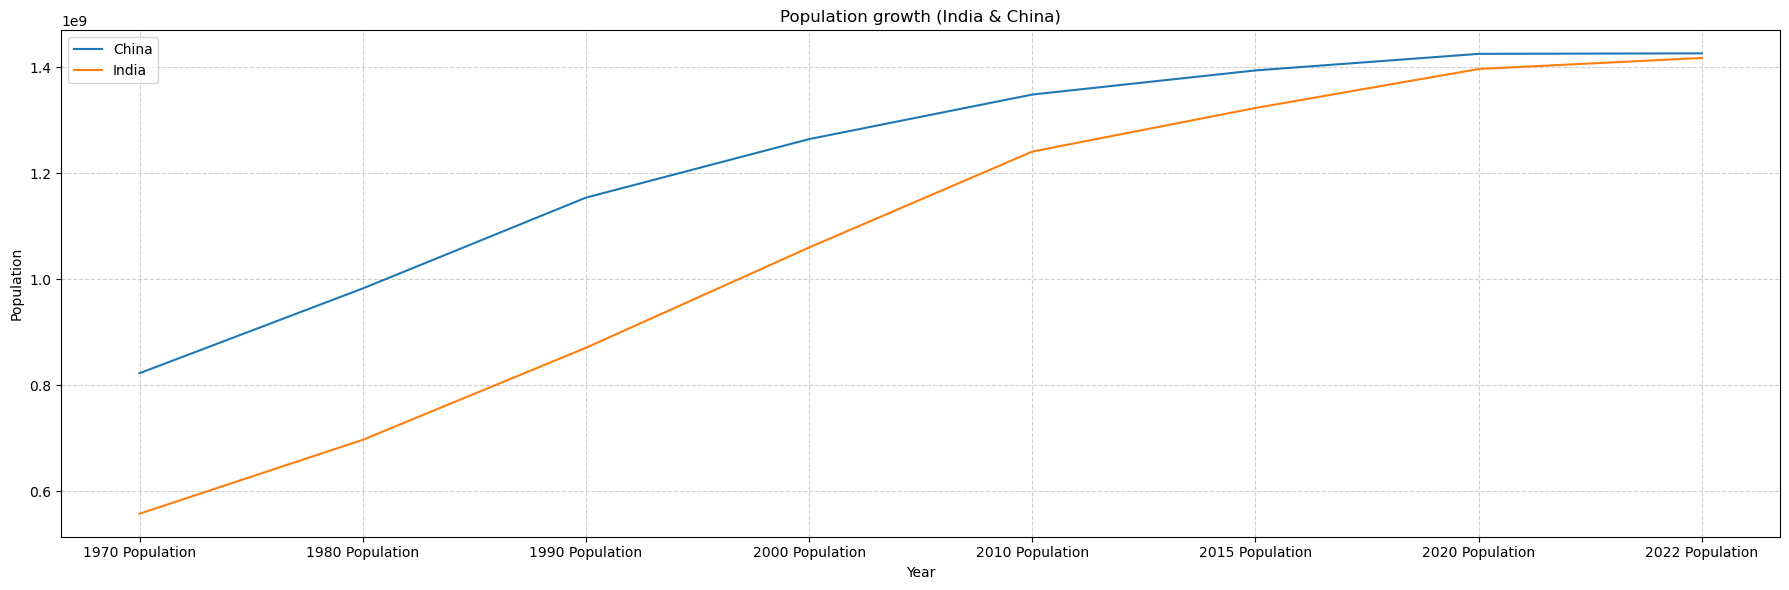

In [8]:
#Growth trends over years for india and china
years= ["1970 Population","1980 Population","1990 Population","2000 Population",
         "2010 Population","2015 Population","2020 Population","2022 Population"]

subset= df[df['Country/Territory'].isin(['India', 'China'])]
plt.figure(figsize=(18,6))
for country in subset['Country/Territory']:
    plt.plot(years, subset[subset['Country/Territory']== country][years].values.flatten(), label= country)

plt.title('Population growth (India & China)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


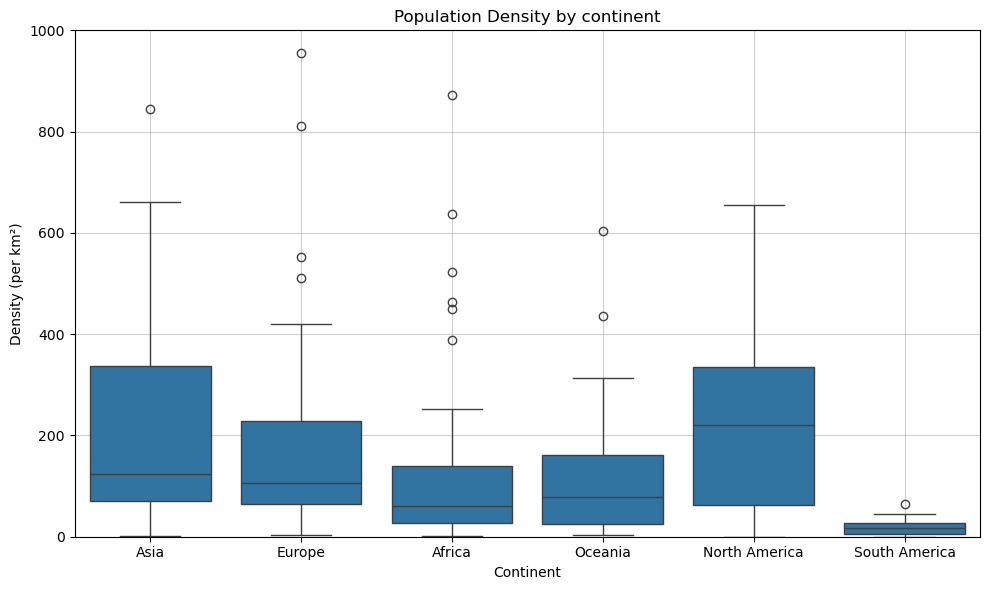

In [9]:
#Population Density by Continent
plt.figure(figsize=(10,6))
sns.boxplot(x='Continent', y='Density (per km²)', data= df )
plt.title('Population Density by continent')
plt.ylim(0, 1000)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

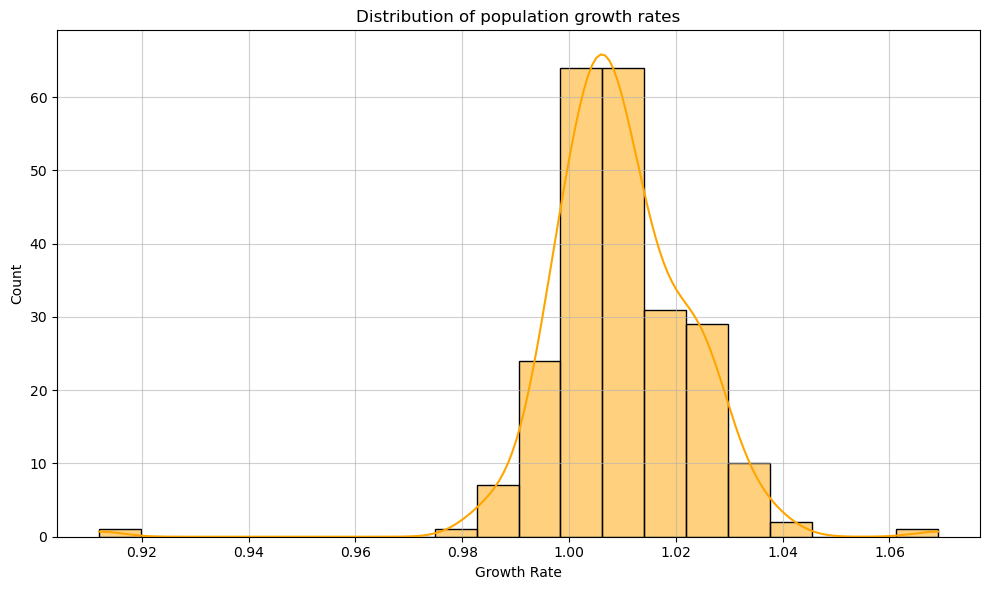

In [10]:
#Growth Rate Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Growth Rate'], bins=20, kde= True, color= 'orange')
plt.title('Distribution of population growth rates')
plt.tight_layout()
plt.grid(True, alpha=0.6)
plt.show()

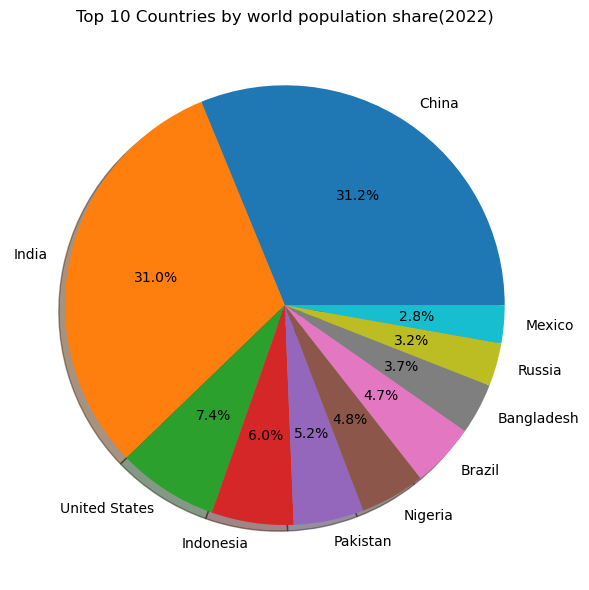

In [11]:
#World Population Share (Pie Chart)
top10= df.nlargest(10, '2022 Population')
plt.figure(figsize=(10,6))
plt.pie(top10['2022 Population'], labels= top10['Country/Territory'], autopct='%1.1f%%', shadow=True)
plt.title('Top 10 Countries by world population share(2022)')
plt.tight_layout()
plt.show()

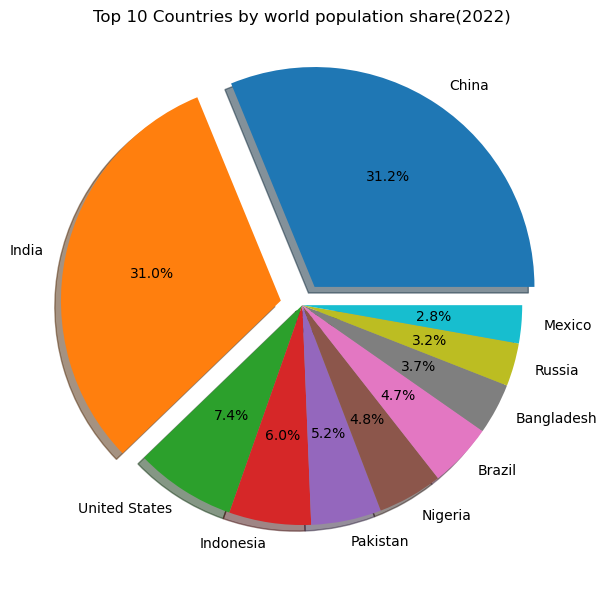

In [12]:
explode= [0.1,0.1, 0,0,0,0,0,0,0,0]
top10= df.nlargest(10, '2022 Population')
plt.figure(figsize=(10,6))
plt.pie(top10['2022 Population'], labels= top10['Country/Territory'], autopct='%1.1f%%', shadow=True,explode=explode)
plt.title('Top 10 Countries by world population share(2022)')
plt.tight_layout()
plt.show()